## Libraries

In [ ]:
## !pip install pandas
## !pip install mlxtend

In [1]:
import numpy as np
import torch
import pandas as pd
## pandas lib could work csv file

import sklearn
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split 
from torch.utils.data import TensorDataset, DataLoader

## standard metrics in regression
## coefficeint in determination
from sklearn.metrics import r2_score


In [3]:

import xgboost as xgb


## Parameters

In [4]:
batch_size = 16
learning_rate = 0.005
N_Epochs = 100

epsilon = 0.0001

## Read data 

In [5]:

path_data = 'data/winequality-white.csv'

WINE_raw_data = pd.read_csv (path_data, delimiter = ";")

## WINE_raw_data -d csv file iig duudaj ugj bn.

In [6]:
WINE_raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
## headers_list

headers_list = WINE_raw_data.columns.values.tolist ()
##csv file iin header deer bga medeelliig avj list helberluu shiljuulj label hiihdee ashiglahad beldej bna

headers_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
headers_list2 = ['density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## Data Analysis

* Correlation Matrix


<function matplotlib.pyplot.show(close=None, block=None)>

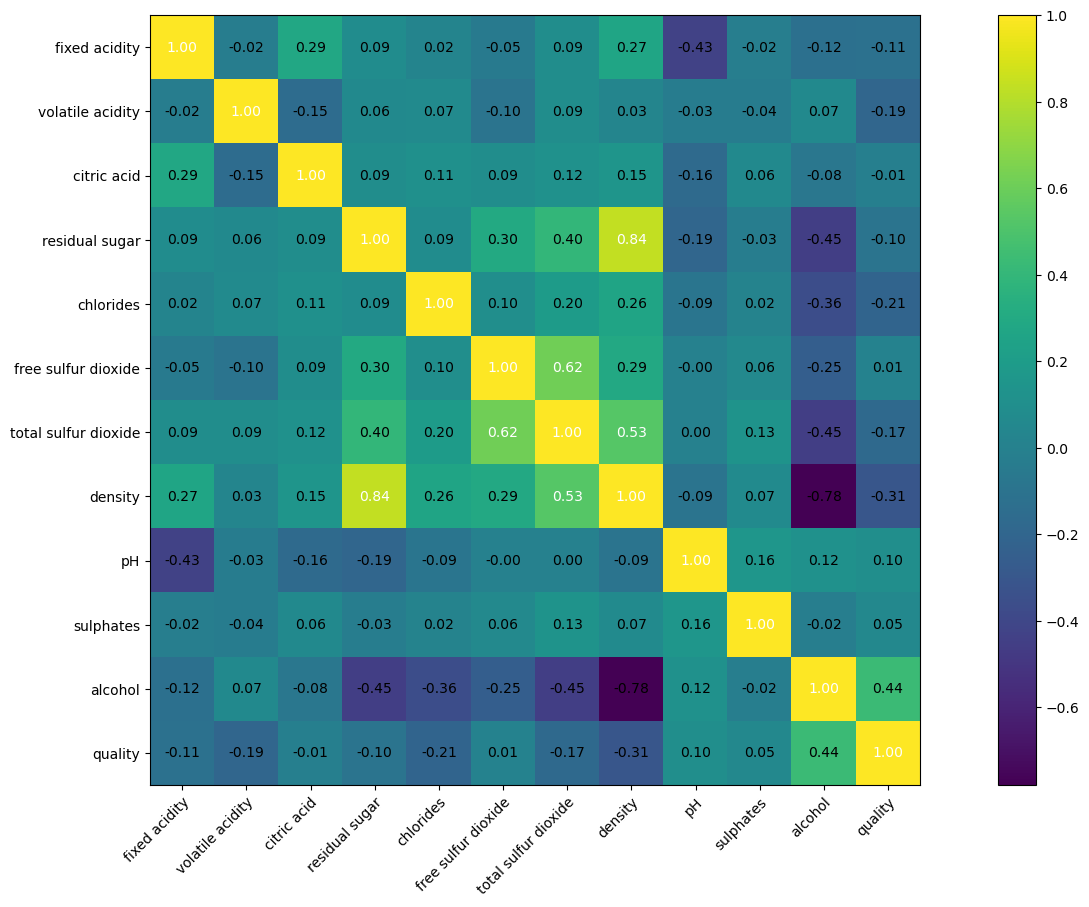

In [9]:
cm = np.corrcoef ( WINE_raw_data[headers_list].values.T  )
hm = heatmap (cm, row_names = headers_list, column_names = headers_list, figsize= (20,10))
## heatmap in doorhi turlii medeelliig haruuldag function.
## if value was 1, those values have positive correlation 
## if value was -1, those values have negative correlation
## if value was 0, there is no correlation between 2 values
## doorhi uzuulsen medeellees quality bolon alcohol 2 iin hoorondin hamaaral hamgiin undur bga gesen medeelel harj boloh n, column quality iin hamgiin undur utga avsan n 0.44 alcohol bn

plt.show

## Process Data

In [10]:
## Convert Pandas to Numpy
## CSV filed bsan datag Pandas aar unshij avsan bsanaa Numpy ruu hurvuulj deer n ajillahad beldej bn

WINE_raw_data_np = WINE_raw_data.to_numpy()


In [11]:
WINE_raw_data_np

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [12]:
WINE_raw_data_np.shape

(4898, 12)

In [13]:
## indexing data

X = WINE_raw_data_np [:, :-1]
## , buh row iig avna. columns aas suuliin negiig songoj avna (slicing)

y = WINE_raw_data_np [:,11:12]



In [14]:
print (X.shape)
print (y.shape)

(4898, 11)
(4898, 1)


In [15]:
random_seed = int (random.random() *100) ## 42

In [16]:
## split X and y

## ????????

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = random_seed)

In [17]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3918, 11)
(980, 11)
(3918, 1)
(980, 1)


## Fix in case float64 error

In [18]:
y_test.dtype ## sometimes torch gives you problem because of data had different data type 

dtype('float64')

In [19]:
## fix data type

X_train = X_train.astype (np.float32)
X_test = X_test.astype (np.float32)
y_train = y_train.astype (np.float32)
y_test = y_test.astype (np.float32)

In [20]:
X_train.dtype
X_test.dtype
y_train.dtype
y_test.dtype

dtype('float32')

In [21]:
## convert data to torch from Numpy

X_train_tr = torch.from_numpy (X_train)
X_test_tr  = torch.from_numpy (X_test)
y_train_tr = torch.from_numpy (y_train)
y_test_tr  = torch.from_numpy (y_test)


## Normalization

* Normalization
* Standardization (*)

In [22]:
## X_scaled = (X - x_means)/X_standard_dev

x_means      = X_train_tr.mean (0, keepdim = True )
x_deviations = X_train_tr.std (0, keepdim = True ) + epsilon


In [23]:

x_means


tensor([[6.8566e+00, 2.7671e-01, 3.3420e-01, 6.3712e+00, 4.5989e-02, 3.5417e+01,
         1.3811e+02, 9.9402e-01, 3.1890e+00, 4.8992e-01, 1.0511e+01]])

In [24]:

x_deviations 


tensor([[8.5174e-01, 9.9408e-02, 1.2052e-01, 5.0040e+00, 2.2860e-02, 1.7124e+01,
         4.2675e+01, 3.0325e-03, 1.5108e-01, 1.1463e-01, 1.2281e+00]])

## Create the DataLoader

In [25]:
train_ds = TensorDataset ( X_train_tr, y_train_tr )

In [26]:
train_dl = DataLoader (train_ds, batch_size , shuffle=True )

## surgah ugugdluu shuffle hiij holij surgahdaa dahin ashiglana.

In [27]:
train_dl

## Neural Network Architectures

In [28]:

## Linear Regression

class LinRegNet (nn.Module):
    ## nn class is neural network class
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means       ##
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear (11,1)
        ## 11,1 those values depend on data.
        
    ## perform inference
    def forward (self, x):
        
        x = (x - self.x_means)/ self.x_deviations
        
        y_pred = self.linear1(x)
        
        ## return torch.round (y_pred)
        return y_pred
    
    

## Training Loop

In [29]:

def training_loop (N_Epochs, model, loss_fn, opt):
    
    for epoch in range (N_Epochs):
        for xb, yb in train_dl:
            
            y_pred = model (xb)
            loss = loss_fn (y_pred, yb)
            
            opt.zero_grad ()
            loss.backward ()
            opt.step ()
        if epoch % 20 == 0:
            print (epoch, "loss=", loss)
            
        
            


In [30]:

## model = LinRegNet ( x_means, x_deviations )
model = LinRegNet ( x_means, x_deviations )

opt = torch.optim.Adam ( model.parameters(), lr =learning_rate )
## optimazation - gradient descent

loss_fn = F.mse_loss 
## belen loss function iig duudaj bn. MSE

training_loop (N_Epochs, model, loss_fn, opt)

0 loss= tensor(25.1693, grad_fn=<MseLossBackward0>)
20 loss= tensor(0.2891, grad_fn=<MseLossBackward0>)
40 loss= tensor(0.4109, grad_fn=<MseLossBackward0>)
60 loss= tensor(0.4408, grad_fn=<MseLossBackward0>)
80 loss= tensor(0.4860, grad_fn=<MseLossBackward0>)


## Evaluate Model

In [31]:

y_pred_test = model ( X_test_tr )


In [32]:
y_pred_test.shape

torch.Size([980, 1])

In [33]:

## r2_score is predicted x

## y_pred_test


In [34]:
print ( "Testing R**2: ", r2_score ( y_test_tr.numpy(), y_pred_test.detach().numpy() ) )

## range 0 - 1, best is 1

Testing R**2:  0.2565579905759914


In [35]:

y_pred_test.shape


torch.Size([980, 1])

In [36]:

y_test_tr.shape


torch.Size([980, 1])

In [37]:
len(X_test_tr)

980

In [38]:

list_preds = []
list_reals = []

for i in range (len(X_test_tr)):
    print ("******************")
    print ("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print (np_pred[0],",", np_real[0])
    list_preds.append (  np_pred[0] )
    list_reals.append (  np_real[0] )
    

******************
pred, real
6.4308257 , 6.0
******************
pred, real
6.2730827 , 6.0
******************
pred, real
6.54881 , 6.0
******************
pred, real
5.2805815 , 5.0
******************
pred, real
5.978732 , 6.0
******************
pred, real
5.5763903 , 6.0
******************
pred, real
5.738648 , 5.0
******************
pred, real
6.131055 , 7.0
******************
pred, real
5.2179956 , 6.0
******************
pred, real
6.707179 , 8.0
******************
pred, real
5.891451 , 6.0
******************
pred, real
5.8658137 , 5.0
******************
pred, real
5.4663486 , 5.0
******************
pred, real
6.256951 , 7.0
******************
pred, real
5.549924 , 6.0
******************
pred, real
5.2119746 , 5.0
******************
pred, real
6.203864 , 7.0
******************
pred, real
5.6412234 , 6.0
******************
pred, real
6.478699 , 6.0
******************
pred, real
5.113166 , 4.0
******************
pred, real
5.903047 , 5.0
******************
pred, real
5.7424884 , 7.0
*

## Visualize test predictions

In [39]:

def plot_preds_vs_reals (list_preds, list_reals):
    ## 
    plt.figure (figsize = (13, 4))
    plt.plot (list_reals, label = 'real', color = 'r')
    plt.plot (list_preds, label = 'pred')
    plt.show ()


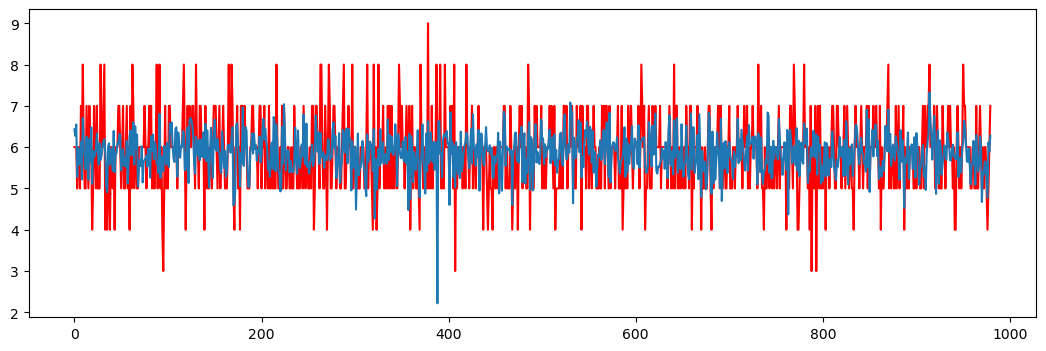

In [40]:

plot_preds_vs_reals (list_preds, list_reals)


## Deploy PyTorch Model

In [48]:

model.eval ()

dummy_input = torch.randn (1, 11)

input_names = ["input1"]
output_names = ["output1"]

torch.onnx.export(
    model,
    dummy_input,
    "DLnet_WineData.onnx",
    verbose=False,
    input_names = input_names,
    output_names = output_names
)


## XGBoost

In [49]:

regressor = xgb.XGBRegressor (
        
        n_estimators = 100,
        reg_lambda = 1,
        gamma = 0,
        max_depth = 10

)


In [50]:

regressor.fit (X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [51]:

y_pred = regressor.predict (X_test)


In [52]:

y_pred.shape


(980,)

In [53]:

y_pred


array([6.0164995, 6.199676 , 6.9482985, 4.9954386, 6.018217 , 5.998553 ,
       5.6076736, 6.7031236, 5.999892 , 7.174231 , 6.145591 , 6.608299 ,
       5.007542 , 6.6030703, 5.486235 , 4.907552 , 7.0006227, 5.9992137,
       6.170984 , 5.6172276, 5.59056  , 7.0009646, 6.2173285, 5.002959 ,
       6.1679034, 5.9748325, 5.8061476, 5.0112514, 7.998931 , 5.439818 ,
       6.721923 , 6.495914 , 6.3005714, 5.3529463, 5.0548296, 5.6082106,
       5.1176896, 5.9970126, 5.5661116, 5.9966583, 6.445813 , 4.999284 ,
       6.169062 , 3.7190342, 6.8127136, 5.728903 , 5.9994855, 6.377899 ,
       6.989745 , 6.7587166, 5.005967 , 6.000473 , 7.0004015, 6.1691346,
       5.533175 , 5.858146 , 6.6455355, 5.0027127, 5.2615523, 6.1107025,
       7.2659087, 5.0040016, 6.282288 , 7.0016956, 5.0006857, 6.0041194,
       5.895269 , 5.0029945, 5.3760953, 5.720937 , 5.523804 , 5.7967567,
       6.0210643, 5.1187444, 6.1852417, 5.7779555, 5.902208 , 6.281936 ,
       5.4835305, 5.9989514, 5.946366 , 5.9813766, 

In [54]:

r2_score (y_test, y_pred)


0.47171874599083596

## Deploy XGBoost Model

* ONIX and GitHub